In [195]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['font.size'] = 12
matplotlib.rcParams['axes.unicode_minus'] = False

In [341]:
df_x = pd.read_csv('data/x_train.csv', encoding='euc-kr')
df_y = pd.read_csv('data/y_train.csv', encoding='euc-kr')
df = pd.merge(df_x, df_y, on='cust_id')
df.fillna(0, inplace=True)
df

,cust_id,총구매액,최대구매액,환불금액,주구매상품,주구매지점,내점일수,내점당구매건수,주말방문비율,구매주기,gender
0,0,68282840,11264000,6860000.0,기타,강남점,19,3.894737,0.527027,17,0
1,1,2136000,2136000,300000.0,스포츠,잠실점,2,1.500000,0.000000,1,0
2,2,3197000,1639000,0.0,남성 캐주얼,관악점,2,2.000000,0.000000,1,1
3,3,16077620,4935000,0.0,기타,광주점,18,2.444444,0.318182,16,1
4,4,29050000,24000000,0.0,보석,본 점,2,1.500000,0.000000,85,0
...,...,...,...,...,...,...,...,...,...,...,...
3495,3495,3175200,3042900,0.0,골프,본 점,1,2.000000,1.000000,0,1
3496,3496,29628600,7200000,6049600.0,시티웨어,부산본점,8,1.625000,0.461538,40,1
3497,3497,75000,75000,0.0,주방용품,창원점,1,1.000000,0.000000,0,0
3498,3498,1875000,1000000,0.0,화장품,본 점,2,1.000000,0.000000,39,0


In [272]:
df_m = df.loc[df.gender==1].iloc[:, 1:-1]
df_w = df.loc[df.gender==0].iloc[:, 1:-1]

In [198]:
df_m.reset_index(drop=True, inplace=True)
df_w.reset_index(drop=True, inplace=True)

In [228]:
df_m_p = df_m.groupby('주구매상품')[['주구매상품']].count()
df_w_p = df_w.groupby('주구매상품')[['주구매상품']].count()
df_m_p.columns = ['man']
df_w_p.columns = ['woman']

df_p = pd.merge(df_m_p, df_w_p, left_index=True, right_index=True, how='outer')
idx = df_p.notnull()

<AxesSubplot:xlabel='주구매상품'>

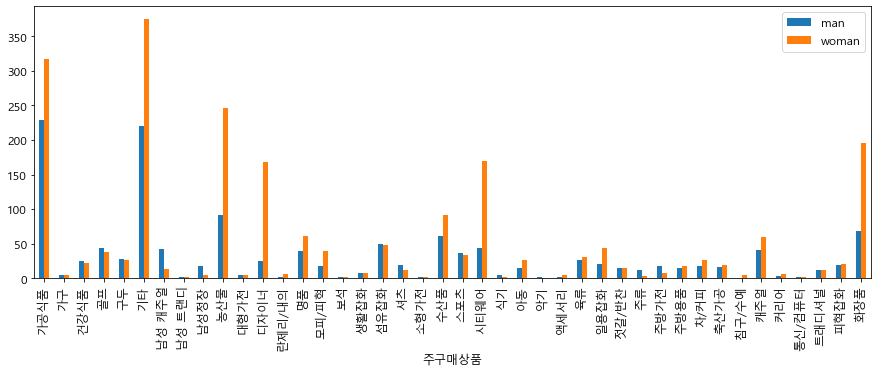

In [244]:
df_p.plot.bar(figsize=(15,5))

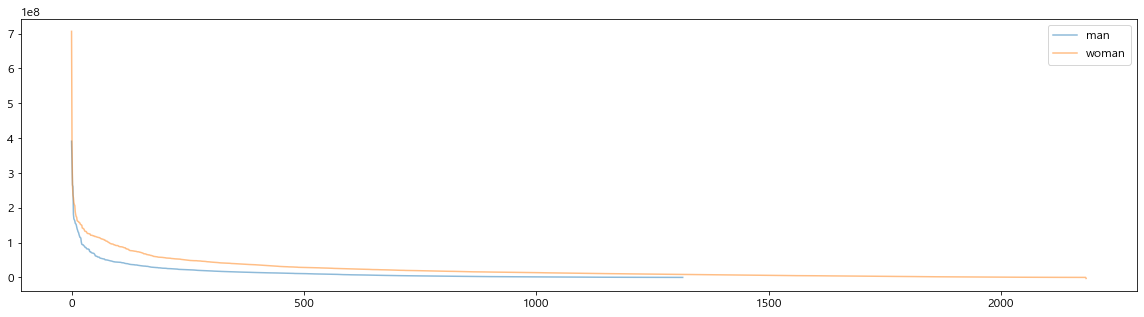

In [302]:
tmp_m = df_m.sort_values('최대구매액', ascending=False)['최대구매액']
tmp_m = tmp_m.reset_index(drop=True)

tmp_w = df_w.sort_values('최대구매액', ascending=False)['최대구매액']
tmp_w = tmp_w.reset_index(drop=True)


plt.figure(figsize=(20, 5))
tmp_m.plot.line(label='man', alpha=0.5)
tmp_w.plot.line(label='woman', alpha=0.5)
plt.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


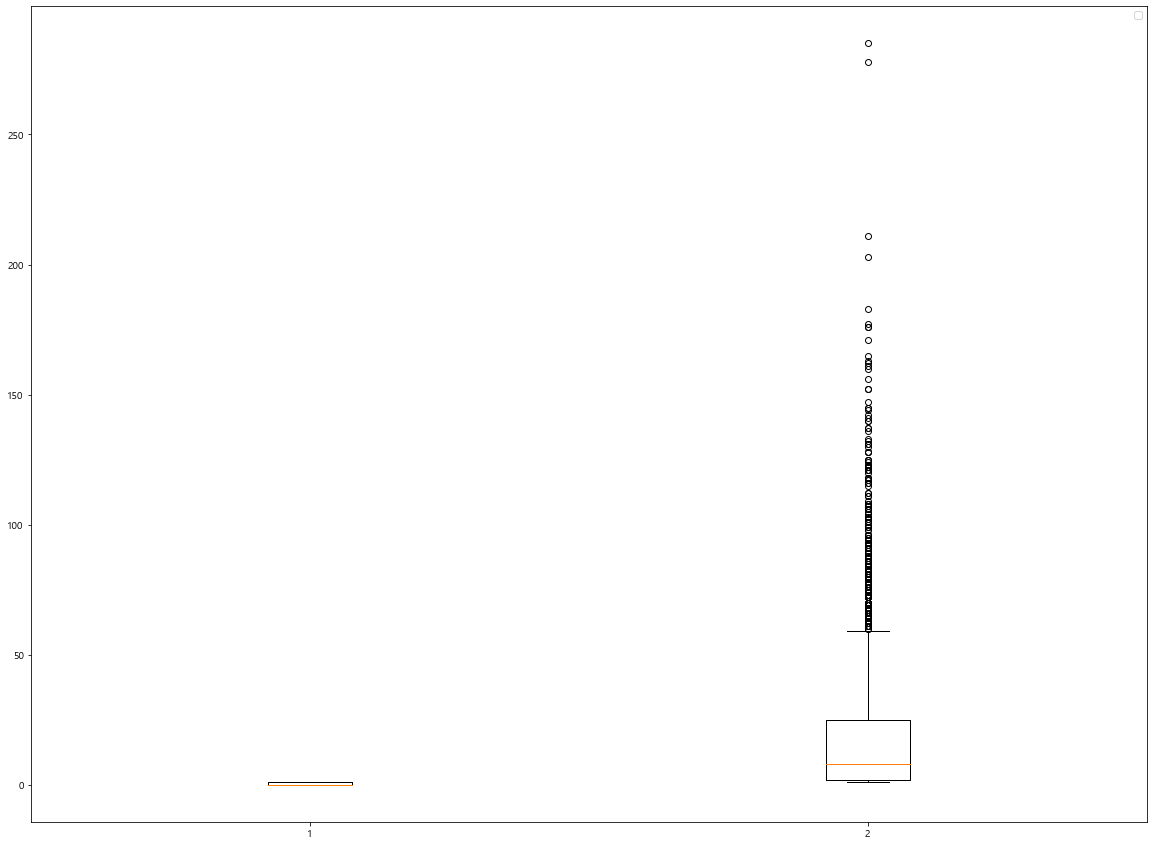

In [352]:

plt.figure(figsize=(20, 15))
plt.boxplot([df['gender'], df['내점일수']])
plt.legend()

In [323]:
F_statistic

86.10773730426266

In [324]:
pVal

2.9049494405763796e-20

In [266]:
temp['qcut'] = pd.qcut(temp['총구매액'], 4, labels=[1, 2, 3, 4])


In [297]:
df_m.shape

(1316, 9)

In [329]:
import scipy.stats as stats
import pandas as pd
import urllib
# from statsmodels.formula.api import ols
# from statsmodels.stats.anova import anova_lm
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
url = 'https://raw.githubusercontent.com/thomas-haslwanter/statsintro_python/master/ipynb/Data/data_altman/altman_910.txt'
data = np.genfromtxt(urllib.request.urlopen(url), delimiter=',')

In [343]:
df

,cust_id,총구매액,최대구매액,환불금액,주구매상품,주구매지점,내점일수,내점당구매건수,주말방문비율,구매주기,gender
0,0,68282840,11264000,6860000.0,기타,강남점,19,3.894737,0.527027,17,0
1,1,2136000,2136000,300000.0,스포츠,잠실점,2,1.500000,0.000000,1,0
2,2,3197000,1639000,0.0,남성 캐주얼,관악점,2,2.000000,0.000000,1,1
3,3,16077620,4935000,0.0,기타,광주점,18,2.444444,0.318182,16,1
4,4,29050000,24000000,0.0,보석,본 점,2,1.500000,0.000000,85,0
...,...,...,...,...,...,...,...,...,...,...,...
3495,3495,3175200,3042900,0.0,골프,본 점,1,2.000000,1.000000,0,1
3496,3496,29628600,7200000,6049600.0,시티웨어,부산본점,8,1.625000,0.461538,40,1
3497,3497,75000,75000,0.0,주방용품,창원점,1,1.000000,0.000000,0,0
3498,3498,1875000,1000000,0.0,화장품,본 점,2,1.000000,0.000000,39,0


In [344]:
temp = df[['gender', '총구매금액']]
temp.columns = ['gender', 'price']
temp

KeyError: "['총구매금액'] not in index"

In [346]:
import warnings
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

model = ols('최대구매액 ~ C(gender)', df).fit()
print(anova_lm(model))

               df        sum_sq       mean_sq          F        PR(>F)
C(gender)     1.0  4.680634e+16  4.680634e+16  46.323559  1.174744e-11
Residual   3498.0  3.534456e+18  1.010422e+15        NaN           NaN


In [ ]:
import scipy.stats as stats
F_statistic, pVal = stats.f_oneway(df_m['내점일수'], df_w['내점일수'])

print('F={0:.1f}, p={1:.5f}'.format(F_statistic, pVal))

F=86.1, p=0.00000


               df        sum_sq       mean_sq          F        PR(>F)
C(gender)     1.0  4.680634e+16  4.680634e+16  46.323559  1.174744e-11
Residual   3498.0  3.534456e+18  1.010422e+15        NaN           NaN


In [337]:
df

,value,treatment
0,243.0,1.0
1,251.0,1.0
2,275.0,1.0
3,291.0,1.0
4,347.0,1.0
5,354.0,1.0
6,380.0,1.0
7,392.0,1.0
8,206.0,2.0
9,210.0,2.0
